### Задание 1

Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком).

Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


### Suicide Rates Overview 1985 to 2016 (Compares socio-economic info with suicide rates by year and country)
ссылка на датасет на kaggle - https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

#### Разведочный анализ данных

##### Расшифровка показателей: 
country - страна
year -год
sex - пол
age - возраст
suicides_no - количество суицидов
population - популяция/численность населения соответствующего возраста и пола
suicides/100k pop - количество суицидов на 100 тысяч человек соответвующей категории (формула вычисления коэффиециента: кол-во суицидов категории / численность соответсвующей категории * 100 000)
country-year - общая колонка для станы и года
(HDI)- Human Development Index - индекс человеческого развития
На русском языке хорошо описан тут:https://gtmarket.ru/ratings/human-development-index
gdp_for_year - ВВП в год
gdp_per_capita - ВВП на душу населения
generation - поколение

##### Названия поколений (согласно Википедии)
1880—1899	Потерянное поколение - англ. Lost Generation
1900—1919	Великое поколение - англ. Greatest Generation
1920—1939	Молчаливое поколение - англ. Silent Generation
1940—1959	Беби-бум - англ. Baby Boom Generation
1960—1979	Поколение X - англ. Generation X
1980—1999	Поколение Y - англ. Generation Y
2000—2009	Поколение Z - англ. Generation Ζ
2010—2020	Поколение A (альфа)
##### Названия поколений (согласно датафрейму): 
'G.I. Generation'(1900 -1923), 'Silent'(1923-1943), 'Boomers'(1943-1963), 'Generation X'(1963-1983), 'Millenials'(1983-2003), 'Generation Z'(2003-н.в.)
Теория поколений американских учёных: Уильям Штраус (William Strauss) и Нэйл Хоув (Neil Howe)
Характеристики и дефиниции поколений отличаются в разных странах в зависимости от политических, экономических, социальных и других условий

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [40]:
data = pd.read_csv('master.csv')
#data.info()
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [94]:
# удаляю ненужные столбцы "HDI for year" и "country-year"
data = data.drop(['HDI for year', 'country-year'], axis=1)
#узнаем, сколько и какие страны представлены в датафрейме
data['country'].nunique()
countries = data['country'].unique()
#узнаем, сколько и какие поколения представлены в датафрейме
data['generation'].nunique()
data['generation'].unique()
#узнаем, какие возрастные категории представлены в датафрейме
data['age'].unique()

array(['75+ years', '55-74 years', '35-54 years', '25-34 years',
       '15-24 years', '5-14 years'], dtype=object)

In [95]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
636,Argentina,1989,male,75+ years,208,400000,52.00,"76,636,898,036",2670,G.I. Generation
637,Argentina,1989,male,55-74 years,548,2105000,26.03,"76,636,898,036",2670,G.I. Generation
638,Argentina,1989,male,35-54 years,462,3561000,12.97,"76,636,898,036",2670,Silent
639,Argentina,1989,female,75+ years,65,622000,10.45,"76,636,898,036",2670,G.I. Generation
640,Argentina,1989,male,25-34 years,219,2287000,9.58,"76,636,898,036",2670,Boomers


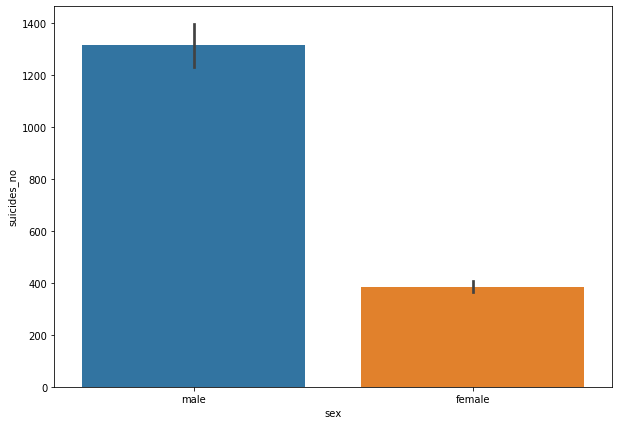

In [88]:
# отражаю общее количество суицидов за выделенный период в разрезе пола по 101 стране, представленной в датасете
sns.barplot(x='sex', y='suicides_no', data=data)

In [42]:
# изменю изначальный датафрейм, оставляю информацию о суицидах в 20 странах в период с 1989 по 2015 год (для более удобной визуализации)
# меняю временной промежуток, т.к. данные о суицидах за более ранние и более поздние года есть не у всех стран
right_years = list(range(1989,2016))
selected_countries = ['Argentina','Australia','Belgium','Brazil','Canada','France','Germany','Italy',
                           'Japan','Kazakhstan','Mexico','Netherlands','Poland','Republic of Korea',
                           'Russian Federation','Ukraine','United Arab Emirates',
                           'United States', 'United Kingdom', 'Thailand']
data = data.loc[data['year'].isin(right_years)]
data = data.loc[data['country'].isin(selected_countries)]
#data.info()
#data.head()

In [96]:
data2 = data[['year', 'sex', 'suicides_no']]
#data2.head()

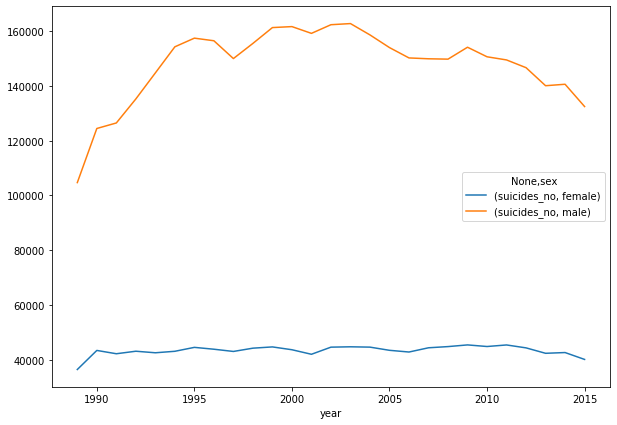

In [8]:
# Агрегируем общее количество самоубийств по годам и по полу
suicides_dynamics = data2.groupby(['year', 'sex']).sum()
suicides_dynamics
suicides_dynamics.unstack('sex').plot()

### Мужчины во много раз чаще совершают самоубийства
### Гипотеза: Женщины совершают самоубийства со сравнительно одинаковой частотой (в отличие от мужчин)

In [97]:
data3 = data[['year', 'sex', 'suicides/100k pop']]
#data3.head()

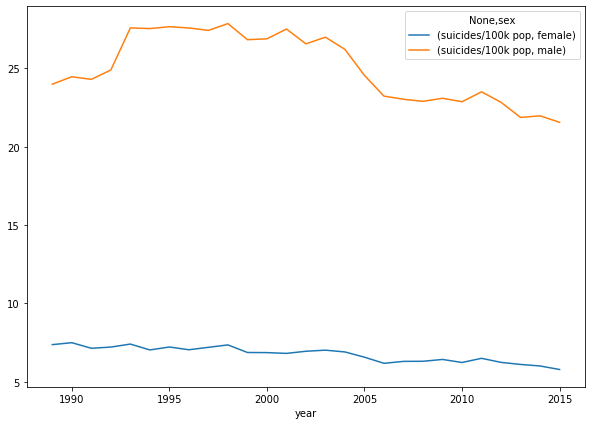

In [10]:
# выводим общее среднее значение Показателя (коэффиециента) суицидов по годам и по полу
suicides_dynamics_2 = data3.groupby(['year', 'sex']).mean()
suicides_dynamics_2
suicides_dynamics_2.unstack('sex').plot()

### В 1993 году начинается резкий рост Показателя суицидов среди мужского населения, который после достижения пика в 1994 году оставался стабильно высоким вплоть до 2003 года (с двумя небольшими всплесками в 1998 и в 2002 годах), а потом начал снижаться.
### В 2005 году Показатель суицидов снизился до уровня 1989 года, после чего продолжил падать (за исключением небольшого скачка в 2012 году - этот скачок заметен на срезах обоих полов).
### Гипотеза: в 2003 года произошло (или стало происходить на регулярной основе) какое-то событие(ия), приведшее к постепенному устойчивому снижению Показателя суицидов среди обоих полов (но особенно среди мужчин)

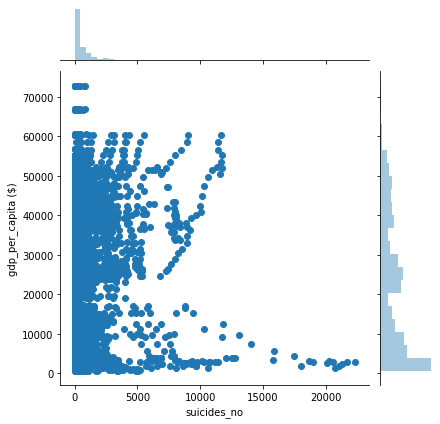

In [75]:
sns.jointplot(x='suicides_no', y='gdp_per_capita ($)', 
              data=data, kind= 'scatter')

### Гипотеза: Чем выше в стране ВВП на душу населения, тем ниже количество самоубийств в этой стране

In [38]:
#создаю тепловую карту, отражающую информацию о количестве самоубийств среди определенных поколений
gen_suicides = data.pivot_table(
                        index='country', 
                        columns='generation', 
                        values='suicides_no', 
                        aggfunc=sum).fillna(0).applymap(float)

#gen_suicides.head()

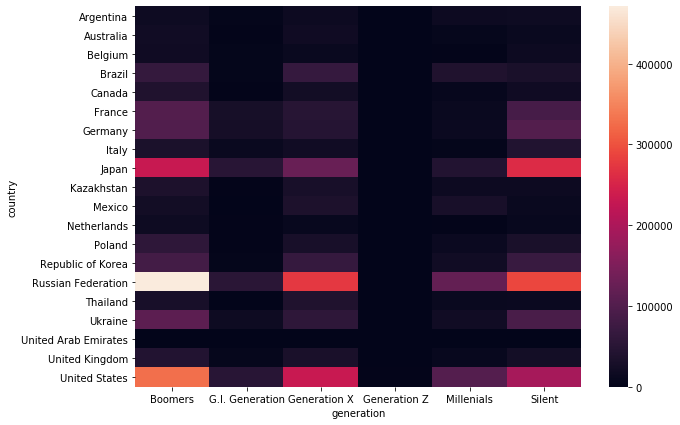

In [13]:
ax = sns.heatmap(gen_suicides)

### Россия явно лидирует по количеству самоубийств в период с 1989 по 2015 год
### Гипотеза: События, происходившие в мире в период с 1989 по 2015 год сильнее всего ударили по поколению бумеров (особенно тех, кто жил в России)
### Гипотеза: В 90-е года в России много смертей людей приписывали к категории "самоубийство" (сокрытия убийств, передозировки, алкогольные отравления)

In [37]:
#создаю тепловую карту, отражающую информацию о количестве самоубийств среди определенных возрастных категорий 
age_suicides = data.pivot_table(
                        index='country', 
                        columns='age', 
                        values='suicides_no', 
                        aggfunc=sum).fillna(0).applymap(float)

#age_suicides.head()

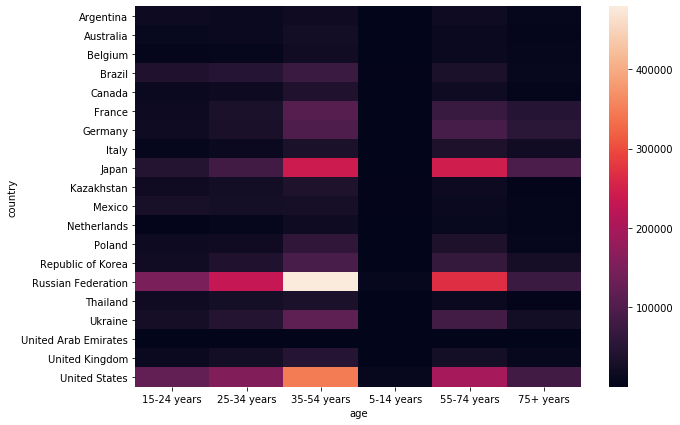

In [15]:
ax = sns.heatmap(age_suicides)

### Гипотеза: Наиболее склонны к самоубийству люди возраста 34-54 , чуть менее - 55-74, на третьем месте - подростки и молодые люди - 15-24. 

In [36]:
#создаю тепловую карту, отражающую информацию о количестве самоубийств среди мужчин и женщин 
year_country_suicides = data.pivot_table(
                        index='country', 
                        columns='year', 
                        values='suicides_no', 
                        aggfunc=sum).fillna(0).applymap(float)

#year_country_suicides.head(5)

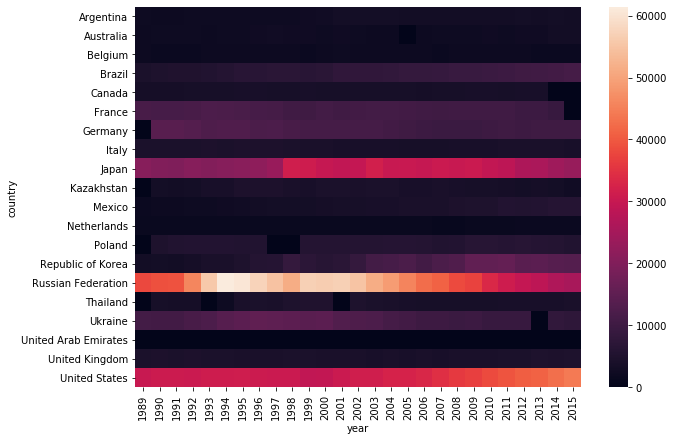

In [35]:
ax = sns.heatmap(year_country_suicides)

### Карта среди прочего показывает ужасающую картину общего количества самоубийств в Российской Федерации с 1993 по 2003 гг. Также мы видим динамику по увеличению/уменьшениию количества суицидов по всем 20 странам, включая лидеров рейтинга - РФ, США, Японию, Украину

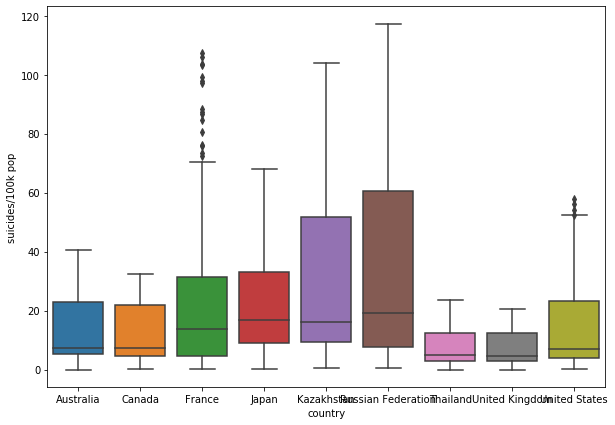

In [73]:
# возьмем половину из рассматриваемых стран, с разных континентов и регионов и проанализируем общие Показатели суицидов за период 
selected_countries_2 = ['Australia', 'Canada', 'France', 'Japan', 
                        'Kazakhstan', 'Russian Federation','United States', 
                        'United Kingdom', 'Thailand']
ax = sns.boxplot(x="country", y="suicides/100k pop", 
            data=data[data.country.isin(selected_countries_2)])

### Видим, что несмотря на довольно высокое количество суицидов в США, которе можно наблюдать в предыдущей визуализации (тепловая карта), данные боксплота по Показателю суицидов отражают намного более радужную картину - размах меньше Франции и Японии, медиана - почти на уровне стран, которые можно отнести к странам с низкими количеством и Показателями суицидов (Австралия, Канада, Великобритания).
### В случае с Казахстаном - обратная ситуация - общее количество суицидов, показанное на предыдущей тепловой карте, не отражает проблему, а сам Показатель суицидов очень высокий.

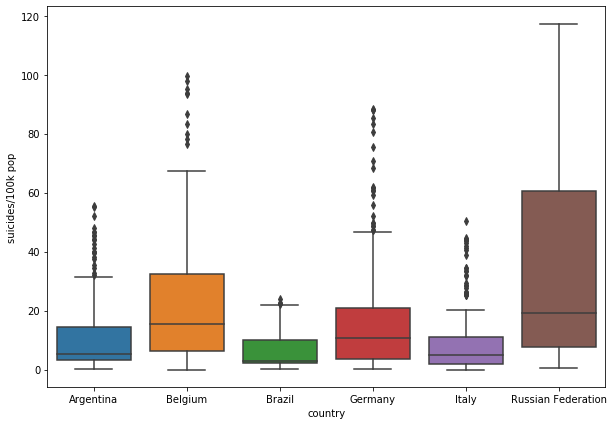

In [92]:
# возьмем половину из оставшихся стран, и посмотрим размах Показателей суицидов(для сравнения добавляем боксплот РФ)
selected_countries_3 = ['Argentina', 'Belgium', 'Brazil', 'Germany', 
                        'Italy', 'Russian Federation']
ax = sns.boxplot(x="country", y="suicides/100k pop", 
            data=data[data.country.isin(selected_countries_3)])

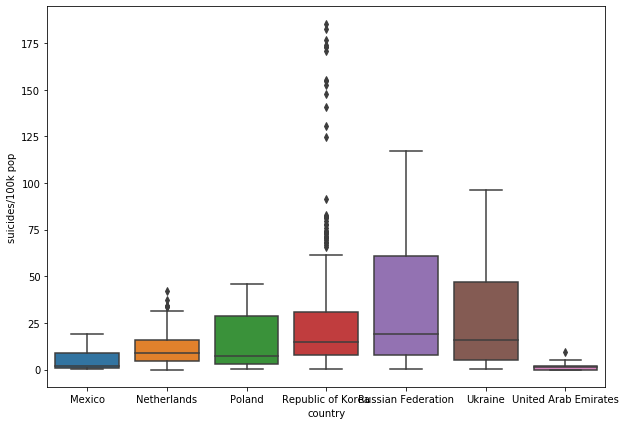

In [91]:
# возьмем оставшиеся страны, и посмотрим размах Показателей суицидов (для сравнения добавляем боксплот РФ)
selected_countries_4 = ['Russian Federation','Mexico', 'Netherlands',
                        'Poland', 'Republic of Korea', 'Ukraine', 'United Arab Emirates']
ax = sns.boxplot(x="country", y="suicides/100k pop", 
            data=data[data.country.isin(selected_countries_4)])

### Представленные Европейские страны имеют большое количество выбросов, но больше всего выделяется Бельгия и Франция
### Корея - большое количество выбросов - очень высокие по сравнению с остальными странами.
### Гипотеза: Суициды в Корее нибирают обороты (в указанный период)

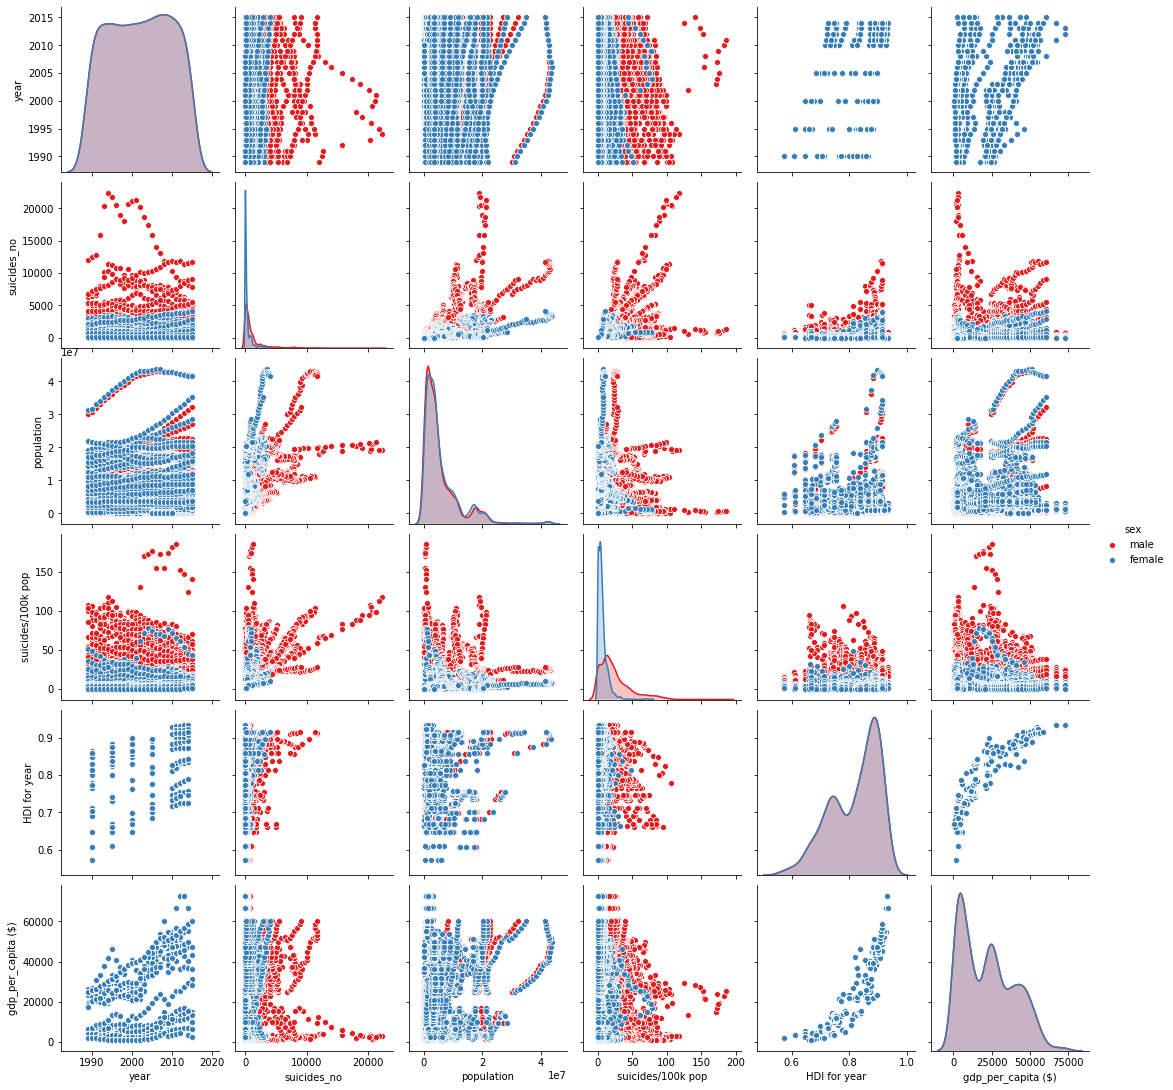

In [79]:
#посмотрим отношения между всеми парами переменных в цветомвом разрезе пола
sns.pairplot(data, hue='sex', palette='Set1');